In [22]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import tensorflow as tf
from tensorflow import keras

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import os
import sys
import tempfile

In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [5]:
file = tf.keras.utils
data = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V26', 'V27', 'V28', 'Amount', 'Class']].describe()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
neg , pos = np.bincount(data['Class'])
total = neg + pos
print('Example:\n Total:{}\n Positive:{}({:.2f}% of total)\n'.format(total, pos, 100*pos/total))

Example:
 Total:284807
 Positive:492(0.17% of total)



In [9]:
cleaned_df = data.copy()
cleaned_df.pop('Time')

eps = 0.001 
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
train , test = train_test_split(cleaned_df, test_size=0.2)
train , val = train_test_split(train, test_size=0.2)

In [13]:
train_labels = np.array(train.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val.pop('Class'))
test_labels = np.array(test.pop('Class'))

In [14]:
train_features = np.array(train)
val_features = np.array(val)
test_features = np.array(test)

In [15]:
print(f'Average class probability in training set: {train_labels.mean():.4f}')
print(f'Average class probability in validation set: {val_labels.mean():.4f}')
print(f'Average class probability in test set: {test_labels.mean():.4f}')

Average class probability in training set: 0.0017
Average class probability in validation set: 0.0017
Average class probability in test set: 0.0017


In [17]:
scalar = StandardScaler()
train_features = scalar.fit_transform(train_features)

val_features = scalar.transform(val_features)
test_features = scalar.transform(test_features)

In [18]:
train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)

In [19]:
print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


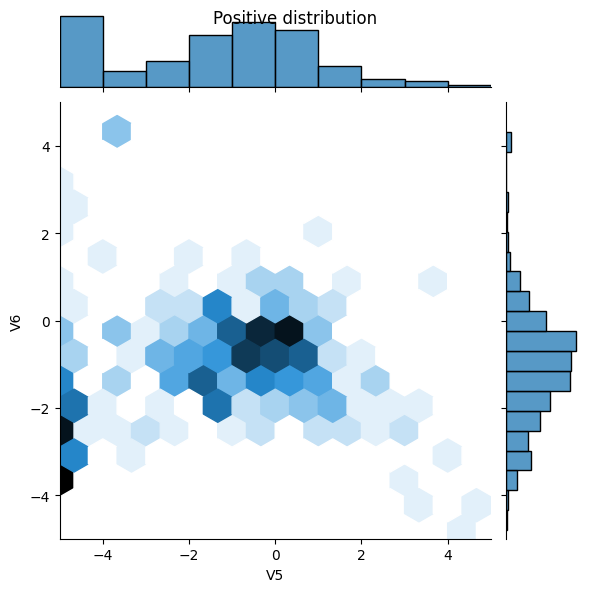

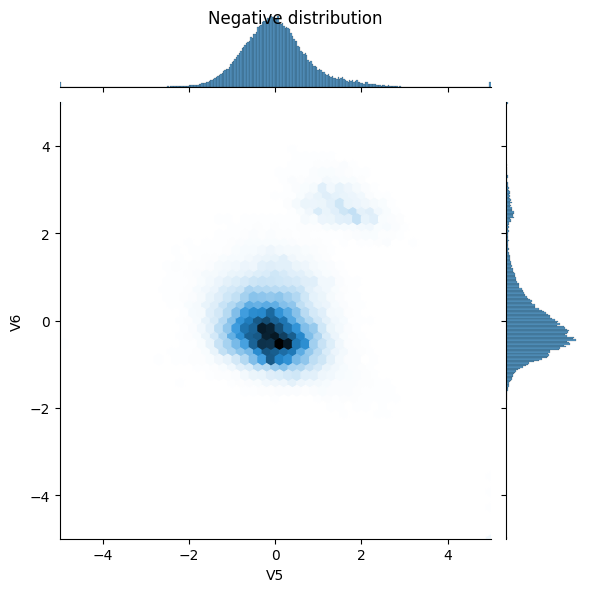

In [21]:
pos = pd.DataFrame(train_features[ bool_train_labels], columns=train.columns)
neg = pd.DataFrame(train_features[~bool_train_labels], columns=train.columns)

sns.jointplot(x=pos['V5'], y=pos['V6'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg['V5'], y=neg['V6'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

In [26]:
METRICS = [
    keras.metrics.BinaryCrossentropy(name = 'cross entropy'),
    keras.metrics.MeanSquaredError(name = 'Brier Score'),
    keras.metrics.TruePositives(name = 'tp'),
    keras.metrics.FalsePositives(name = 'fp'),
    keras.metrics.TrueNegatives(name = 'tn'),
    keras.metrics.FalseNegatives(name = 'fn'),
    keras.metrics.Precision(name = 'precision'),
    keras.metrics.Recall(name = 'recall'),
    keras.metrics.AUC(name = 'auc'),
    keras.metrics.AUC(name = 'prc', curve = 'PR')
]

In [27]:
def model(metrics = METRICS, bias=None):
    if bias is not None:
        bias = tf.keras.initializers.Constant(bias)
    model = keras.Sequential([
        keras.layers.Dense(
        16, activation = 'relu',
        input_shape = (train_features.shape[-1],)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation = 'sigmoid',
                            bias_initializer = bias)
    ])

    model.compile(
        optimizer = keras.optimizers.Adam(lr = 1e-3),
        loss = keras.losses.BinaryCrossentropy(),
        metrics = metrics)
    return model
